In [1]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
DATA_PATH = Path("data\SRP120552.tsv").absolute()
METADATA_PATH = Path("data\metadata_SRP120552.tsv").absolute()

In [3]:
counts = pd.read_csv(DATA_PATH, sep="\t")

In [4]:
counts

,Gene,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
0,ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
3,ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
4,ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43358,ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43359,ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
43360,ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43361,ENSG00000286271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.806760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
counts = counts.set_index("Gene")

In [6]:
counts

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,1.535458,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,10.885117,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,6.612335,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,3.073701,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,1.921149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,0.000000,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,1.535458,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,10.885117,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,6.612335,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,3.073701,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,1.921149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,0.000000,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
counts = counts.T

In [15]:
counts = counts.astype(int)

In [16]:
counts

Gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286262,ENSG00000286263,ENSG00000286264,ENSG00000286265,ENSG00000286266,ENSG00000286268,ENSG00000286269,ENSG00000286270,ENSG00000286271,ENSG00000286272
SRR6191750,56,0,52,6,0,0,155,59,0,2,...,0,0,0,0,1,0,3,0,0,0
SRR6191751,210,0,181,9,27,0,343,400,0,0,...,0,0,0,0,7,0,6,0,0,0
SRR6191752,0,0,250,6,0,0,33,0,0,3,...,0,0,0,0,0,0,0,0,0,0
SRR6191753,15,0,61,0,140,0,278,44,1,152,...,0,0,0,0,0,0,2,0,0,0
SRR6191754,0,0,0,9,0,0,0,12,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6192403,147,0,112,0,0,0,428,66,0,0,...,0,0,0,0,3,0,1,0,0,0
SRR6192404,0,0,7,3,0,0,1,62,0,9,...,0,0,0,0,8,0,6,0,0,0
SRR6192405,369,0,0,2,0,0,1793,29,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR6192406,0,0,248,2,0,0,268,0,44,0,...,0,0,0,0,8,0,0,0,0,0


In [17]:
meta = pd.read_csv(METADATA_PATH, sep="\t")

In [18]:
metadata = pd.DataFrame(
        zip(
            meta["refinebio_accession_code"], 
            meta["refinebio_time"],
        ),
        columns=["sample", "condition"]
    )

In [19]:
metadata = metadata.set_index("sample")


In [20]:
metadata

,condition
sample,
SRR6191750,t24
SRR6191751,t24
SRR6191752,t24
SRR6191753,t24
SRR6191754,t24
...,...
SRR6192403,t72
SRR6192404,t72
SRR6192405,t72


In [21]:
dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="condition")

C:\Users\danie\AppData\Local\Temp\ipykernel_4136\756416363.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="condition")


In [22]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.76 seconds.

Fitting dispersions...
... done in 7.71 seconds.

Fitting dispersion trend curve...
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 7.95 seconds.

Fitting LFCs...
... done in 13.19 seconds.

Calculating cook's distance...
... done in 1.43 seconds.

Replacing 12210 outlier genes.

Fitting dispersions...
... done in 3.56 seconds.

Fitting MAP dispersions...
... done in 3.48 seconds.

Fitting LFCs...
... done in 4.92 seconds.



In [23]:
stat_res = DeseqStats(dds, n_cpus=1, contrast= ("condition", "t72", "t0"))

In [24]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition t72 vs t0
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        3.129489  0.432727  7.232017  4.758738e-13   
ENSG00000000005   0.000979        0.100770  4.719605  0.021351  9.829654e-01   
ENSG00000000419  23.293440        1.016092  0.299807  3.389151  7.010946e-04   
ENSG00000000457  22.110150        0.060755  0.333918  0.181947  8.556244e-01   
ENSG00000000460  11.645426       -0.492290  0.643513 -0.765004  4.442692e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.490371  1.693889  0.289494  7.722034e-01   
ENSG00000286269   4.181108        0.944288  0.252248  3.743485  1.814852e-04   
ENSG00000286270   0.002937        0.100771  4.719605  0.021352  9.829652e-01   
ENSG00000286271   0.040833       -0.205565  2.750351 -0.074742

... done in 2.49 seconds.



In [25]:
res = stat_res.results_df

In [26]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
ENSG00000000003,35.012368,3.129489,0.432727,7.232017,4.758738e-13,8.094726e-12
ENSG00000000005,0.000979,0.100770,4.719605,0.021351,9.829654e-01,NaN
ENSG00000000419,23.293440,1.016092,0.299807,3.389151,7.010946e-04,2.423022e-03
ENSG00000000457,22.110150,0.060755,0.333918,0.181947,8.556244e-01,8.954242e-01
ENSG00000000460,11.645426,-0.492290,0.643513,-0.765004,4.442692e-01,5.475341e-01
...,...,...,...,...,...,...
ENSG00000286268,0.080639,0.490371,1.693889,0.289494,7.722034e-01,NaN
ENSG00000286269,4.181108,0.944288,0.252248,3.743485,1.814852e-04,7.289209e-04
ENSG00000286270,0.002937,0.100771,4.719605,0.021352,9.829652e-01,NaN


In [27]:
from sanbomics.tools import id_map

In [28]:
mapper = id_map(species = 'human')

In [29]:
res['symbol'] = res.index.map(mapper.mapper)

In [30]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000000003,35.012368,3.129489,0.432727,7.232017,4.758738e-13,8.094726e-12,TSPAN6
ENSG00000000005,0.000979,0.100770,4.719605,0.021351,9.829654e-01,NaN,TNMD
ENSG00000000419,23.293440,1.016092,0.299807,3.389151,7.010946e-04,2.423022e-03,DPM1
ENSG00000000457,22.110150,0.060755,0.333918,0.181947,8.556244e-01,8.954242e-01,SCYL3
ENSG00000000460,11.645426,-0.492290,0.643513,-0.765004,4.442692e-01,5.475341e-01,C1orf112
...,...,...,...,...,...,...,...
ENSG00000286268,0.080639,0.490371,1.693889,0.289494,7.722034e-01,NaN,NaN
ENSG00000286269,4.181108,0.944288,0.252248,3.743485,1.814852e-04,7.289209e-04,AC092661.1
ENSG00000286270,0.002937,0.100771,4.719605,0.021352,9.829652e-01,NaN,AL591074.2


In [31]:
res = res[res.baseMean >= 10]

In [32]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [33]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000000003,35.012368,3.129489,0.432727,7.232017,4.758738e-13,8.094726e-12,TSPAN6
ENSG00000000419,23.293440,1.016092,0.299807,3.389151,7.010946e-04,2.423022e-03,DPM1
ENSG00000000971,186.032932,3.360344,0.288794,11.635786,2.710818e-31,2.806778e-29,CFH
ENSG00000001461,34.097906,-1.521084,0.335674,-4.531437,5.858389e-06,3.263103e-05,NIPAL3
ENSG00000001629,55.581819,1.457345,0.341047,4.273150,1.927311e-05,9.589396e-05,ANKIB1
...,...,...,...,...,...,...,...
ENSG00000286070,24.087823,0.540342,0.217605,2.483134,1.302323e-02,3.067164e-02,GGT1
ENSG00000286071,11.916429,2.010063,0.367109,5.475380,4.365725e-08,3.610012e-07,AL136171.2
ENSG00000286147,70.405958,-0.547006,0.170882,-3.201067,1.369198e-03,4.368232e-03,AC092445.1


In [34]:
from sanbomics.plots import volcano

In [35]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000000003,35.012368,3.129489,0.432727,7.232017,4.758738e-13,8.094726e-12,TSPAN6
ENSG00000000419,23.293440,1.016092,0.299807,3.389151,7.010946e-04,2.423022e-03,DPM1
ENSG00000000457,22.110150,0.060755,0.333918,0.181947,8.556244e-01,8.954242e-01,SCYL3
ENSG00000000460,11.645426,-0.492290,0.643513,-0.765004,4.442692e-01,5.475341e-01,C1orf112
ENSG00000000971,186.032932,3.360344,0.288794,11.635786,2.710818e-31,2.806778e-29,CFH
...,...,...,...,...,...,...,...
ENSG00000286129,20.961065,0.431466,0.265711,1.623815,1.044153e-01,1.733101e-01,NaN
ENSG00000286147,70.405958,-0.547006,0.170882,-3.201067,1.369198e-03,4.368232e-03,AC092445.1
ENSG00000286169,14.891288,1.745067,0.484370,3.602759,3.148569e-04,1.193853e-03,NaN


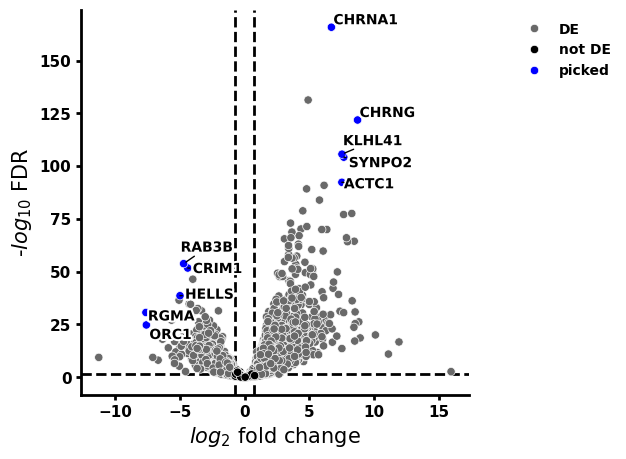

In [45]:
volcano(res, symbol='symbol', colors= ['dimgrey', 'black', 'blue'],)

In [40]:
sorted_sigs = sigs.sort_values(by="padj", ascending=True)

In [41]:
sorted_sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000138435,567.853949,6.698320,0.240427,27.860134,8.119317e-171,1.370297e-166,CHRNA1
ENSG00000170581,319.234379,4.900853,0.197430,24.823205,5.036078e-136,4.249694e-132,STAT2
ENSG00000196811,80.919455,8.719529,0.364641,23.912665,2.261479e-126,1.272232e-122,CHRNG
ENSG00000239474,167.852490,7.514334,0.337129,22.289214,4.701716e-110,1.983772e-106,KLHL41
ENSG00000172403,284.501594,7.655500,0.345899,22.132187,1.548822e-108,5.227894e-105,SYNPO2
...,...,...,...,...,...,...,...
ENSG00000164087,10.824254,-1.592242,0.699876,-2.275035,2.290382e-02,4.944663e-02,POC1A
ENSG00000119682,15.111508,1.013891,0.445954,2.273534,2.299404e-02,4.958098e-02,AREL1
ENSG00000143319,12.800888,-0.800920,0.352415,-2.272664,2.304646e-02,4.968133e-02,ISG20L2


In [42]:
top50_genes = sorted_sigs.head(50)

In [43]:
top50_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ENSG00000138435,567.853949,6.698320,0.240427,27.860134,8.119317e-171,1.370297e-166,CHRNA1
ENSG00000170581,319.234379,4.900853,0.197430,24.823205,5.036078e-136,4.249694e-132,STAT2
ENSG00000196811,80.919455,8.719529,0.364641,23.912665,2.261479e-126,1.272232e-122,CHRNG
ENSG00000239474,167.852490,7.514334,0.337129,22.289214,4.701716e-110,1.983772e-106,KLHL41
ENSG00000172403,284.501594,7.655500,0.345899,22.132187,1.548822e-108,5.227894e-105,SYNPO2
ENSG00000159251,1336.935565,7.507462,0.360054,20.850942,1.494504e-96,4.203791e-93,ACTC1
ENSG00000103742,178.047936,6.133619,0.296531,20.684577,4.769428e-95,1.149909e-91,IGDCC4
ENSG00000088448,718.785271,4.783405,0.233442,20.490808,2.600422e-93,5.485914e-90,ANKRD10
ENSG00000132386,93.452712,5.776833,0.290579,19.880447,6.009628e-88,1.126939e-84,SERPINF1


In [46]:
top50_genes.to_csv('top50_genes.csv', index=False)